In [1]:
# -*- coding: UTF-8 -*-
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据并设置为df
csv = pd.read_csv('Titanic.csv')
titanic_df = pd.DataFrame(csv)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 提出问题
----------------
- 首先是<b>分析数据</b>：
    - 数据集一共有12个字段：PassengerId、Survived、Pclass、Name、Sex、Age、SibSp、Parch、Ticket、Fare、Cabin、Embarked
    - 与生存无关的数据不分析：PassengerId、Name
    - 选择相对稳定的Pclass进行分析：Pclass、Parch、Ticket、Fare -> Pclass
    - 合并家庭成员：SibSp + Parch = FamilyMember

- <b>提出问题：分析Pclass、Sex、Embarked、SibSp + Parch(FamilyMember)、Age这几个因素，是否对成功获救有影响？</b>

### 数据清理
----------------
- 后续分析不需要，不作处理：Cabin
- 后续分析需要，进行缺失值处理：Age 和 Embarked
    - 用平均值填充Age
    - 舍弃Embarked 缺失值

In [15]:
changed_df = titanic_df.copy()

changed_df['Age'].fillna(changed_df['Age'].mean(),inplace=True)

changed_df.dropna(subset=["Embarked"], inplace=True)
changed_df = changed_df.dropna(subset=["Embarked"])

### 探索分析
---------------

In [6]:
def factor_explore(factor):
    factor_survived = changed_df[[factor, 'Survived']].groupby([factor]).mean()
    factor_survived.plot(kind='bar')
    plt.title(factor + ' VS Survial Rate')
    plt.ylabel(factor + ' Rate')

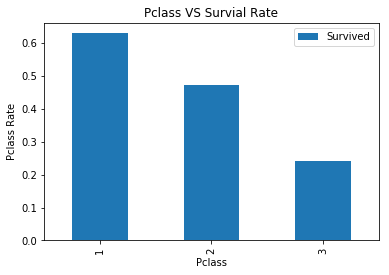

In [7]:
# 舱位等级
factor_explore('Pclass')

> 分析Pclass的条形图可以看出，Pclass为1的柱状最高，Rate超过0.6，其次是Pclass为2的柱状，Rate在0.4~0.5，最后是Pclass为3的柱状，Rate为0.2~0.3。
<br/>**得出结论：一等舱的获救率最高，其次是二等舱，最后是三等舱。**

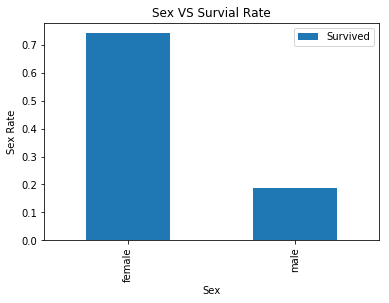

In [8]:
# 性别
factor_explore('Sex')

In [11]:
# 性别的比例
sex_count = changed_df[['Sex','Survived']].groupby(['Sex']).size()
sex_count

Sex
female    314
male      577
dtype: int64

> 分析Sex的条形图可以看出，female的Rate超过了0.7，而male的Rate在0.2左右。并且数据的样本是女性比男性少，不存在样本中女性人数比男性多，占比大的情况。
<br/>**得出结论：女性获救率比男性要高。**

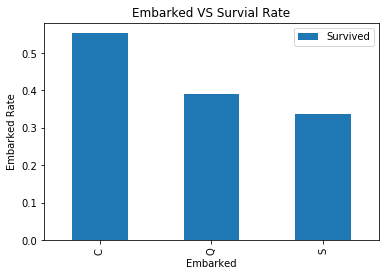

In [16]:
# 港口 
factor_explore('Embarked')

>分析Embarked的条形图可以看出，C口的Rate最高，超过0.5，Q比S稍高一点，不过它们的Rate都在0.3~0.4之间。
<br/>**得出结论：C口上船的人获救率最高。**

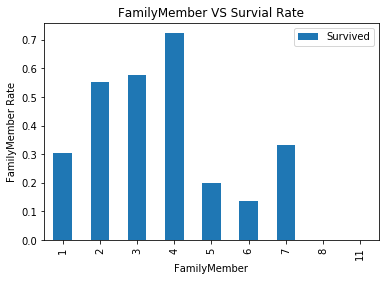

In [10]:
# 家庭成员
changed_df['FamilyMember'] = changed_df['SibSp'] + changed_df['Parch'] + 1

factor_explore('FamilyMember')


>分析FamilyMember的条形图可以看出，1的Rate在0.3左右；2和3的Rate都不到0.6；4的Rate超过了0.7，为最高值；5和6的Rate都不到0.2,其中6是最低的；7的Rate在0.3~0.4之间。
<br/>**得出结论：4口之家获救率最高，最低的是6口人。** 

Text(0.5,0,u'Age')

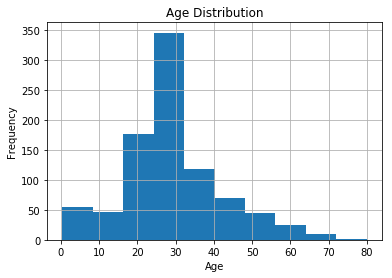

In [20]:
# 年龄
changed_df['Age'].hist()
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')

> 分析Age的直方图可以看出图是右偏态分布的，峰值在25~31的年龄分布中频率最高。
<br/>**得出结论：25~31岁左右的人获救率最高。**

#### 补充
---------------

Survived
0    549
1    342
Name: Survived, dtype: int64


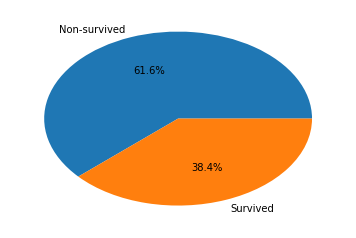

In [10]:
# 幸存者与死亡者的比例
Survived_count =  changed_df.groupby('Survived')['Survived'].count()
print (Survived_count)
plt.pie(Survived_count, labels=['Non-survived','Survived'], autopct='%.1f%%')

> 从上面的饼图可以看出，未获救的人比获救的人多。

### 结论总结
---------------

- Pclass中一等舱获救人数最多，Sex中女性比男性获救率高，Embarked中C口上船的人获救率最高，SibSp + Parch(FamilyMember)中4口人获救率最高，Age中25~31岁获救率最高。

---------------
<b>当前分析结果的限制</b>
- 报告中使用的数据不是全部乘客数,只有891个样本，可能会存在偏差，分析只对当前891个数据准确，如果增大样本量，分析结果会有变动，但对结果影响不大。
- 对缺失值的处理会带入偏差和不确定性，因为已经舍弃或者添加了平均值。
- 有可能影响存活率的因素还可能有：体重，眼睛视力等。
